In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score,cohen_kappa_score
import pandas as pd
from scipy import stats

ANNOTATION_ROUND = "7"

In [2]:
# boda_annotations = pd.read_excel(f'../data/human_annotation_2/human_annotation_2.xlsx', sheet_name='boda')

In [3]:
annotations = pd.read_excel(f'../data/human_annotation_{ANNOTATION_ROUND}/human_annotation_{ANNOTATION_ROUND}.xlsx', sheet_name=None)

In [4]:
# annotations['boda'] = boda_annotations

In [5]:
annotations.keys()

dict_keys(['BXzyXMPh', 'DFou9r7M', 'boda'])

In [6]:
column1 = ['actionability', 'grounding_specificity', 'verifiability','helpfulness']


In [7]:
annotator1 = 'boda'

annotator1_annotations = annotations[annotator1]

In [8]:
cnt = 0
average_scores = {}
all_aspects = ['actionability', 'grounding_specificity', 'verifiability', 'helpfulness', 'verifiability_no_claim']

with open(f"../data/human_annotation_{ANNOTATION_ROUND}/human_annotation_{ANNOTATION_ROUND}_results.txt", "w") as file:
    for annotator in annotations.keys():

        average_score = 0.0
        current_annotator = annotator
        current_annotations = annotations[annotator]
        aspect_data_filtered = {aspect: {annotator1: [], current_annotator: []} for aspect in all_aspects}

        if current_annotator == annotator1:
            continue

        kappa_average = 0
        f1_average = 0
        kappa_quadratic_average = 0

        # Iterate over each aspect
        for aspect in column1:

            ## make a mini  combined dataframe with the aspect column from each annotator
            mini_df = pd.concat([annotator1_annotations[aspect], current_annotations[aspect]], axis=1).dropna()
            mini_df.columns = [annotator1, current_annotator]
            cnt += 1

            possible_values = ['1', '2', '3', '4', '5']
            if aspect == 'verifiability':
                possible_values = ['X','1', '2', '3', '4','5']
            # print(len(mini_df))
            for i in range(len(mini_df)):
                x = mini_df.iloc[i][annotator1]
                y = mini_df.iloc[i][current_annotator]

                try:
                    x = str(int(x))
                    y = str(int(y))
                except:
                    x = str(x)
                    y = str(y)
                if x in possible_values and y in possible_values:

                    if aspect == 'verifiability' and (x == 'X' or y == 'X'):
                        
                        x = '0' if x == 'X' else '1'
                        y = '0' if y == 'X' else '1'
                        aspect_data_filtered['verifiability_no_claim'][annotator1].append(x)
                        aspect_data_filtered['verifiability_no_claim'][current_annotator].append(y)
                    else:
                        aspect_data_filtered[aspect][annotator1].append(x)
                        aspect_data_filtered[aspect][current_annotator].append(y)


        
        

        file.write(f'Agreement Statistics between {annotator1} and {current_annotator}\n')
        for aspect in all_aspects:
            annotator1_data = aspect_data_filtered[aspect][annotator1]
            annotator2_data = aspect_data_filtered[aspect][current_annotator]


            # ################# Remove the samples where the annotators disagreement on human_actionability is more than 1 #################
            # ignore_idecies = []
            # if aspect != 'actionability':
            #     for i in range(len(aspect_data_filtered['actionability'][annotator1])):
            #         val_1 = aspect_data_filtered['actionability'][annotator1][i]
            #         val_2 = aspect_data_filtered['actionability'][current_annotator][i]
            #         if abs(int(val_1) - int(val_2)) > 1:
            #             ignore_idecies.append(i)     
            # assert len(annotator1_data) == len(annotator2_data)
            # annotator1_data = [i for j, i in enumerate(annotator1_data) if j not in ignore_idecies]
            # annotator2_data = [i for j, i in enumerate(annotator2_data) if j not in ignore_idecies]
            # assert len(annotator1_data) == len(annotator2_data)
            # ############################################################################################################

            ################# Remove the samples where the annotators disagreement is more than 1 #################
            # ignore_idecies = []
            # for i in range(len(annotator1_data)):
            #     val_1 = annotator1_data[i]
            #     val_2 = annotator2_data[i]
            #     if abs(int(val_1) - int(val_2)) > 1:
            #         ignore_idecies.append(i)
            # assert len(annotator1_data) == len(annotator2_data)
            # annotator1_data = [i for j, i in enumerate(annotator1_data) if j not in ignore_idecies]
            # annotator2_data = [i for j, i in enumerate(annotator2_data) if j not in ignore_idecies]
            # assert len(annotator1_data) == len(annotator2_data)
            # ############################################################################################################

            # print(annotator1_data)
            # print(annotator2_data)

            file.write(f'Agreement Statistics for {aspect}\n')
            file.write(f' Total number of samples: {len(annotator1_data)}\n')
            file.write(f' F1 Score: {f1_score(annotator1_data,annotator2_data, average="micro"):.2f}\n')

            if aspect != 'verifiability_no_claim':

                file.write(f' Kappa Score: {cohen_kappa_score(annotator1_data, annotator2_data):.2f}\n')
                file.write(f' Linear Kappa Score: {cohen_kappa_score(annotator1_data, annotator2_data, weights="linear"):.2f}\n')
                file.write(f' Quadratic Kappa Score: {cohen_kappa_score(annotator1_data, annotator2_data, weights="quadratic"):.2f}\n')

                res = stats.spearmanr(annotator1_data, annotator2_data)
                file.write(f' Spearman Correlation: {res.correlation:.2f}\n')

                file.write('-' * 50 + '\n')

            if aspect in  ['actionability', 'grounding_specificity', 'verifiability', ]:
                average_score += cohen_kappa_score(annotator1_data, annotator2_data, weights="quadratic")

        file.write('-' * 50 + '\n')
        file.write(f'Average Quadratic Kappa Score: {average_score / 3:.2f}\n')
        average_scores[current_annotator] = average_score / 3
        file.write('=' * 50 + '\n')


In [9]:
print(annotator1_data)
print(annotator2_data)

['0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0']
['0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0']


In [10]:
average_scores = {k: v for k, v in sorted(average_scores.items(), key=lambda item: item[1], reverse=True)}

for annotator in average_scores.keys():
    print(annotator, average_scores[annotator])

BXzyXMPh 0.5518894125380531
DFou9r7M 0.4736704097478335


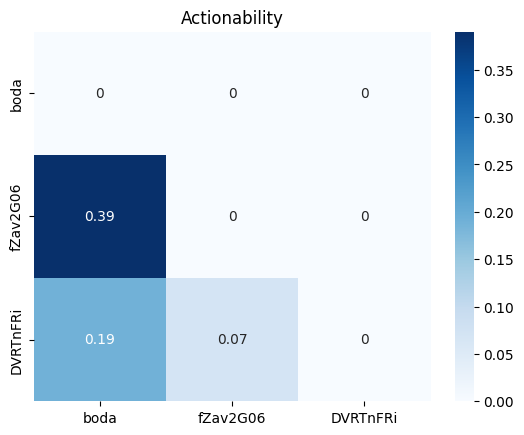

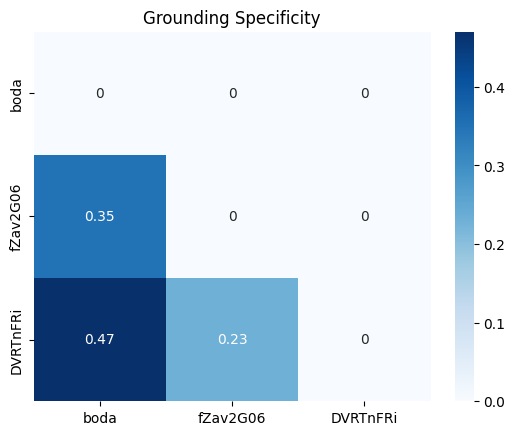

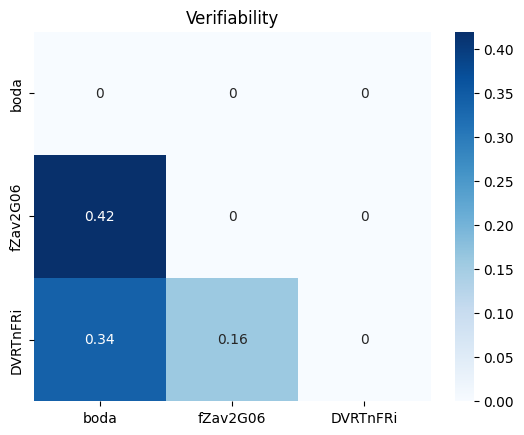

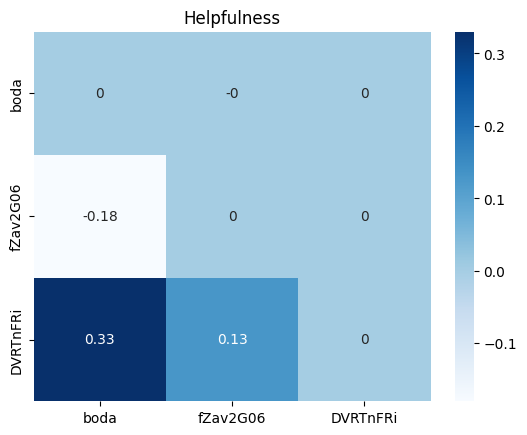

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### ROUND 1
x = ['boda', 'fZav2G06', 'DVRTnFRi']
y = ['boda', 'fZav2G06', 'DVRTnFRi']
actionability = np.array([[0, 0.39, 0.19], [0.39, 0,  0.07], [0.19, 0.07, 0]]) * np.tril(np.ones((3, 3)), -1)
# Create a heatmap
sns.heatmap(actionability, annot=True, cmap='Blues', xticklabels=x, yticklabels=y)
plt.title('Actionability')
plt.show()


grounding_specificity = np.array([[0, 0.35, 0.47], [0.35, 0,  0.23], [0.47, 0.23, 0]]) * np.tril(np.ones((3, 3)), -1)
# Create a heatmap
sns.heatmap(grounding_specificity, annot=True, cmap='Blues', xticklabels=x, yticklabels=y)
plt.title('Grounding Specificity')
plt.show()

verifiability = np.array([[0, 0.42, 0.34], [0.42, 0,  0.16], [0.34, 0.16, 0]]) * np.tril(np.ones((3, 3)), -1)
# Create a heatmap
sns.heatmap(verifiability, annot=True, cmap='Blues', xticklabels=x, yticklabels=y)
plt.title('Verifiability')
plt.show()

helpfulness = np.array([[0, -0.18, 0.33 ], [-0.18, 0,  0.13 ], [0.33, 0.13, 0]]) * np.tril(np.ones((3, 3)), -1)
# Create a heatmap
sns.heatmap(helpfulness, annot=True, cmap='Blues', xticklabels=x, yticklabels=y)
plt.title('Helpfulness')
plt.show()









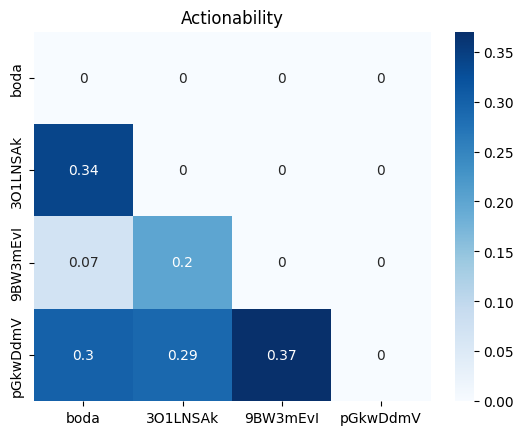

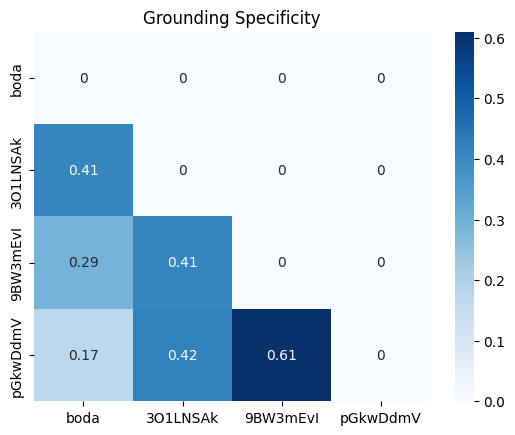

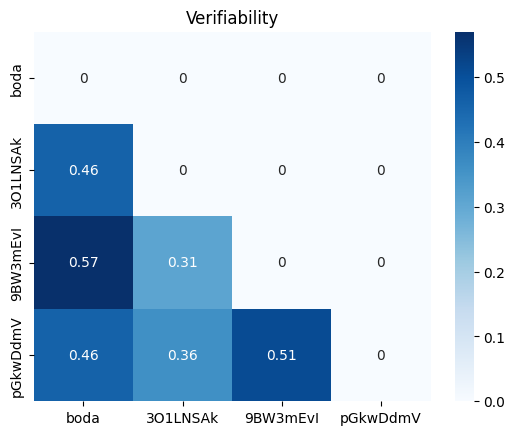

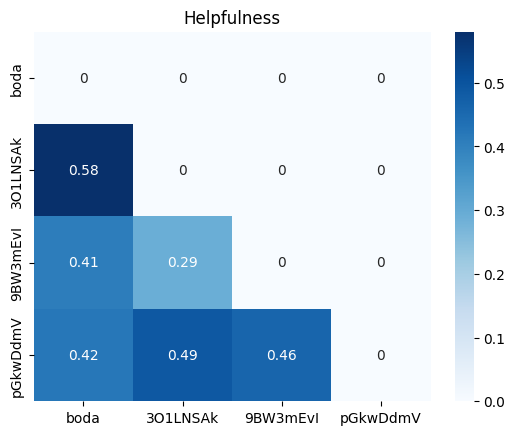

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### ROUND 2
x = ['boda', '3O1LNSAk', '9BW3mEvI', 'pGkwDdmV']
y = ['boda', '3O1LNSAk', '9BW3mEvI', 'pGkwDdmV']
actionability = np.array([[0, 0.34, 0.07, 0.30] , [0.34, 0, 0.20, 0.29], [0.07, 0.20, 0, 0.37 ], [0.30, 0.29, 0.37, 0]]) * np.tril(np.ones((4, 4)), -1)
# Create a heatmap
sns.heatmap(actionability, annot=True, cmap='Blues', xticklabels=x, yticklabels=y)
plt.title('Actionability')
plt.show()

grounding_specificity = np.array([[0, 0.41, 0.29, 0.17 ], [0.41, 0, 0.41, 0.42 ], [0.29, 0.41, 0, 0.61 ], [0.17, 0.42, 0.61, 0]]) * np.tril(np.ones((4, 4)), -1)
# Create a heatmap
sns.heatmap(grounding_specificity, annot=True, cmap='Blues', xticklabels=x, yticklabels=y)
plt.title('Grounding Specificity')
plt.show()

verifiability = np.array([[0, 0.46, 0.57, 0.46 ], [0.46, 0, 0.31, 0.36 ], [0.57, 0.31, 0, 0.51 ], [0.46, 0.36, 0.51, 0]]) * np.tril(np.ones((4, 4)), -1)
# Create a heatmap
sns.heatmap(verifiability, annot=True, cmap='Blues', xticklabels=x, yticklabels=y)
plt.title('Verifiability')
plt.show()

helpfulness = np.array([[0, 0.58, 0.41, 0.42 ], [0.58, 0, 0.29, 0.49 ], [0.41, 0.29, 0, 0.46 ], [0.42, 0.49, 0.46, 0]]) * np.tril(np.ones((4, 4)), -1)
# Create a heatmap
sns.heatmap(helpfulness, annot=True, cmap='Blues', xticklabels=x, yticklabels=y)
plt.title('Helpfulness')
plt.show()


In [13]:
## draw confusion matrix

for aspect in columns_to_plot:
    annotator1_data = aspect_data_filtered[aspect][annotator_1]
    annotator2_data = aspect_data_filtered[aspect][annotator_2]

    if aspect == 'human_verifiability':
        possible_values = ['0','1', '2', '3', '4', '5']
    else:
        possible_values = ['1', '2', '3', '4', '5']
    
    print(aspect)
    cm = confusion_matrix(annotator1_data, annotator2_data, labels=possible_values)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=possible_values)
    disp.plot()
    # print(cm)
    print('-' * 50)


NameError: name 'columns_to_plot' is not defined

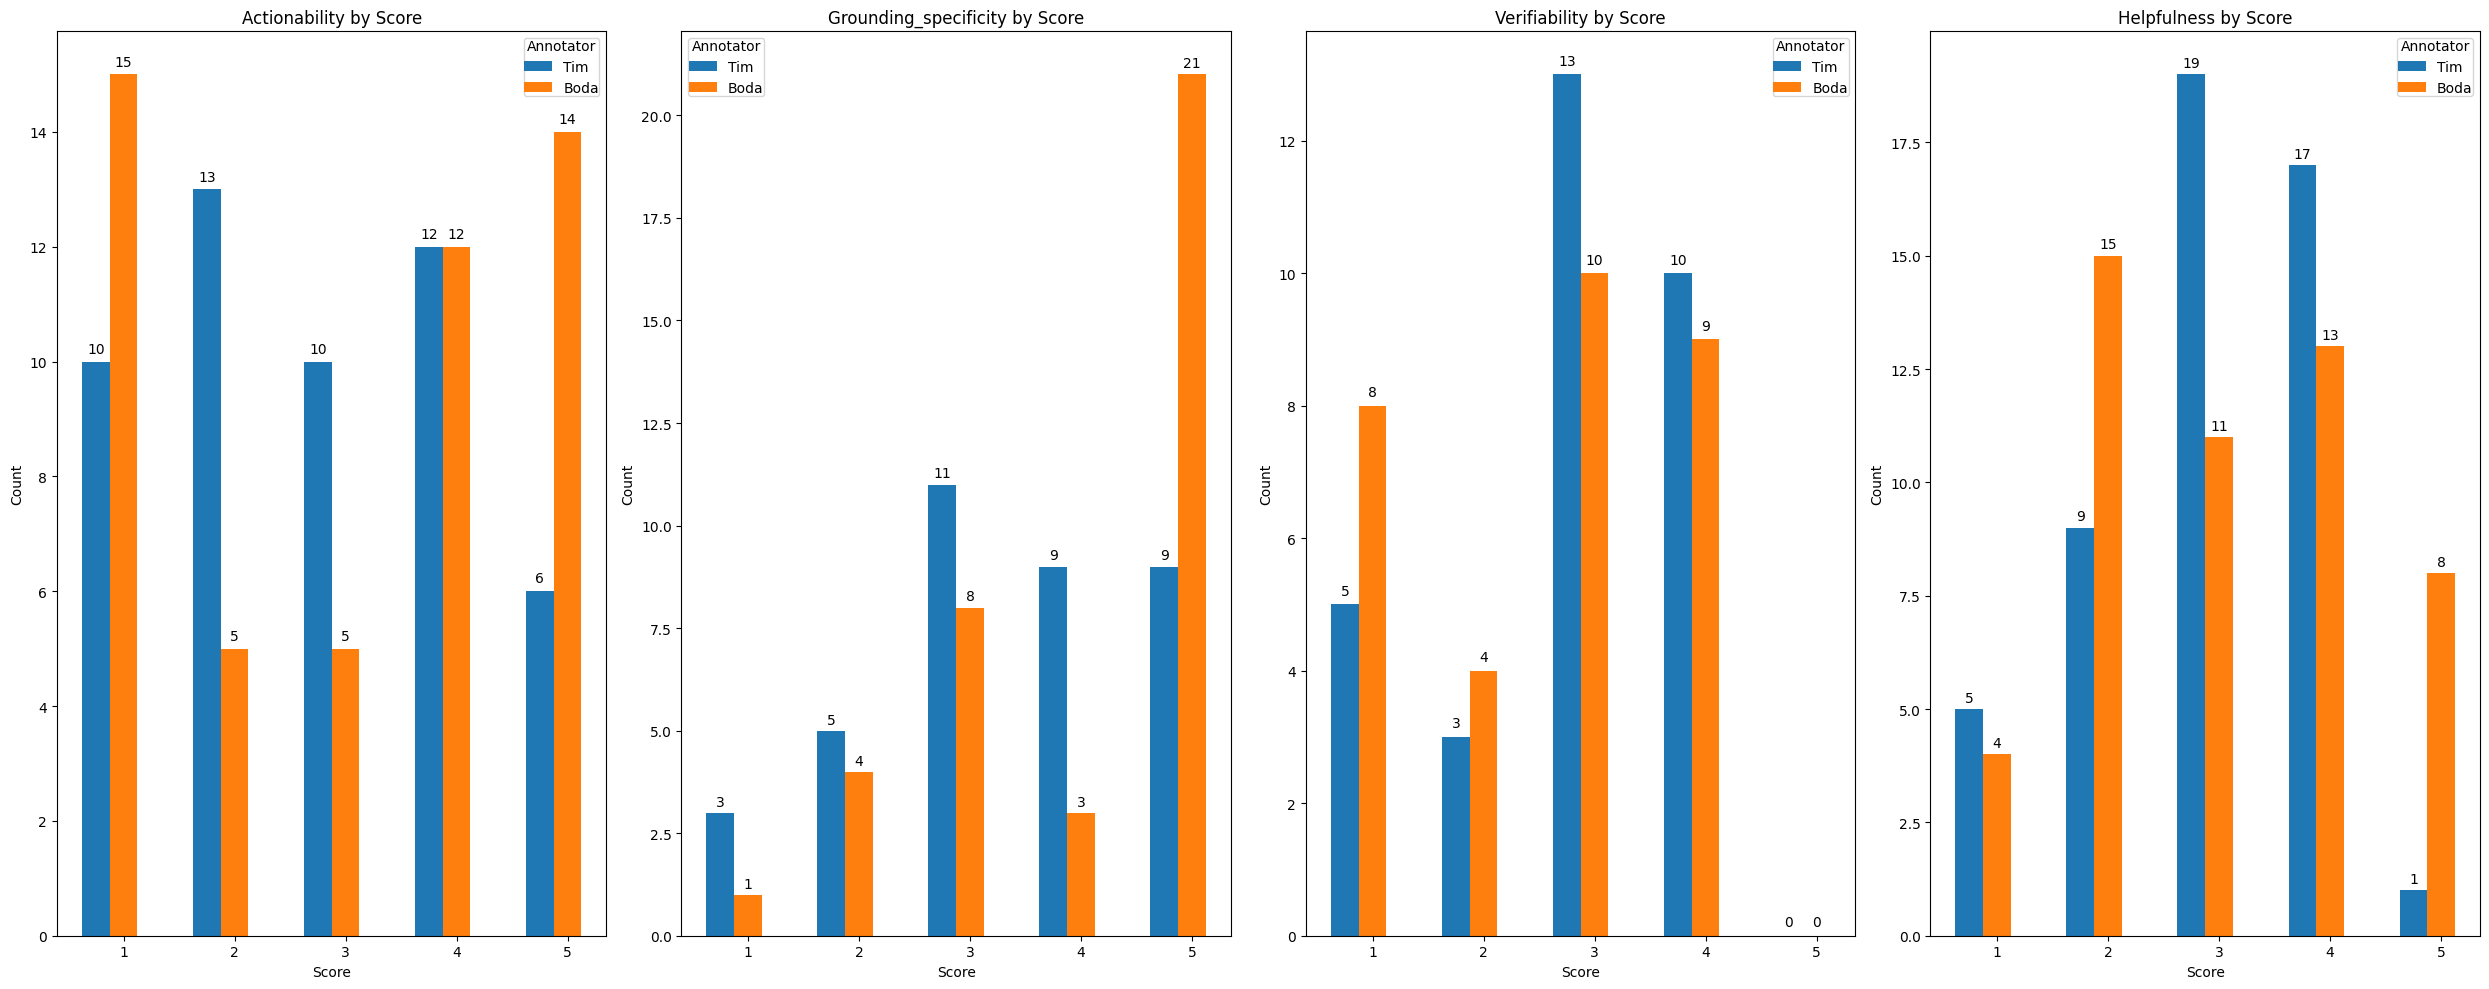

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Redefine data to fit the updated chart structure
# Data is now organized by scores for each aspect

columns_to_plot = column1
annotators = [annotator_1, annotator_2]
# Create chart with separated scores for each aspect
fig, axes = plt.subplots(1, 4, figsize=(25, 10))

# Define score categories for consistent plotting
# scores = [-1, 0, 1]

for idx, aspect in enumerate(columns_to_plot):
    scores = [ 0, 1, 2, 3, 4, 5] if aspect == 'human_verifiability' else [ 1, 2, 3, 4,5]
    x = np.arange(len(scores))  # Score categories
    ax = axes[idx]
    # Offset position for each annotator
    bar_width = 0.25
    for i, annotator in enumerate(annotators):
        counts = [aspect_data_filtered[aspect][annotator].count(str(score)) for score in scores]
        
        # Plot bars for each annotator
        bars = ax.bar(x + i * bar_width, counts, width=bar_width, label=annotator)
        
        # Annotate each bar with the count value
        for bar in bars:
            yval = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2, 
                yval + 0.1,  # Adjust this value for placement above bars
                int(yval), 
                ha='center', 
                va='bottom'
            )

    ax.set_title(f'{aspect.capitalize()} by Score')
    ax.set_xlabel('Score')
    ax.set_ylabel('Count')
    ax.set_xticks(x + bar_width)
    ax.set_xticklabels(scores)
    ax.legend(title='Annotator', borderpad=0.05)

plt.tight_layout()
plt.show()
